# Rain in Australia 
(https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

##### Predict whether or not it will rain tomorrow by training a binary classification model on target Rain Tomorrow

## Content
This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: I should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('weatherAUS.csv', engine = 'python')

In [3]:
data.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [4]:
print(data.shape)
for col in data.columns:
    print(col)

(142193, 24)
Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


* Date - the date when measurements were taken  
* Location - the city where measurements were taken
* MinTemp - minimum temperature
* MaxTemp - maximum temperature
* Rainfall - rainfall measurement  today
* Evaporation - evaporation measurement today
* Sunshine - sunshine measurement today
* WindGustDir - wind gistogram direction
* WindGustSpeed - wind speed
* WindDir9am - wind direction at 9 a.m.
* WindDir3pm - wind direction at 3 p.m.
* WindSpeed9am - wind speed at 9 a.m. 
* WindSpeed3pm - wind speed at 3 p.m.
* Humidity9am - humidity at 9 a.m.
* Humidity3pm - humidity at 3 p.m.
* Pressure9am - pressure at 9 a.m.
* Pressure3pm - pressure at 3 p.m.
* Cloud9am - cloud at 9 a.m.
* Cloud3pm - cloud at 3 p.m.
* Temp9am - temperature at 9 a.m.
* Temp3pm - temperature at 3 p.m.
* RainToday - whether or not it rain today
* RISK_MM - the amount of rainfall in millimeters for the next day
* RainTomorrow - whether or not it rain tomorrow

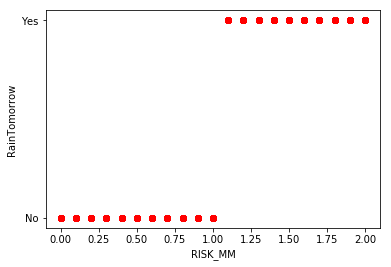

In [5]:
fig = plt.figure()
rain_tommorow = fig.add_subplot(1,1,1)
rain_tommorow.set_ylabel('RainTomorrow')
rain_tommorow.set_xlabel('RISK_MM')
rain_tommorow.plot(data[data['RISK_MM'] <= 2.0]['RISK_MM'], data[data['RISK_MM'] <= 2.0]['RainTomorrow'], 'ro')
pass

RainTomorrow == 'Yes' when RISK_MM > 1.0

RISK_MM is the amount of rainfall in millimeters for the next day. It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. 

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


We may notice that there are missing values in all columns.

In [7]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


Notice: 

1) the big correlation between 'MinTemp' and 'Temp9am' (0.901813), between 'MaxTemp' and 'Temp3pm' (0.984562). I think should left only MinTemp and MaxTemp.

2) the big correlation between 'Pressure9am' and 'Pressure3pm' (0.961348). I think should left the one value 'Pressure' as a mean of these.

In [8]:
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2014-01-08,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [9]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

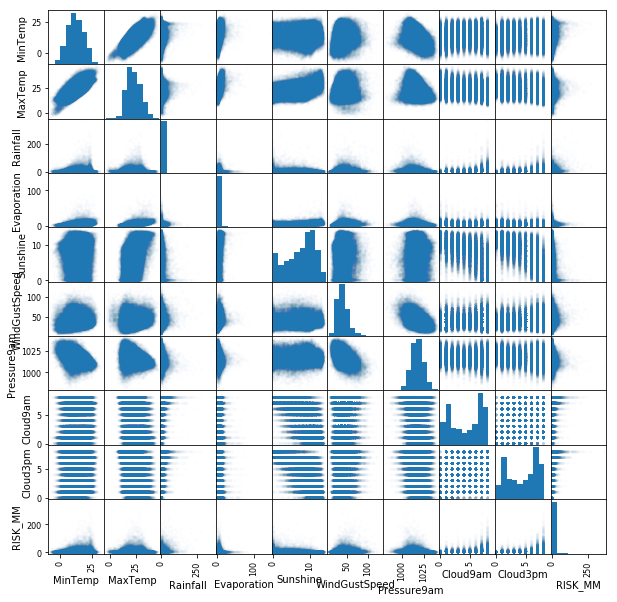

In [10]:
minimum_data = data.drop('Temp9am', axis = 1)\
            .drop('Temp3pm', axis = 1)\
            .drop('WindSpeed9am', axis = 1)\
            .drop('WindSpeed3pm', axis = 1)\
            .drop('Pressure3pm', axis = 1)\
            .drop('Humidity9am', axis = 1)\
            .drop('Humidity3pm', axis = 1)\
            .drop('WindDir3pm', axis = 1)

scatter_matrix(minimum_data, alpha = .01, figsize = (10, 10))
pass

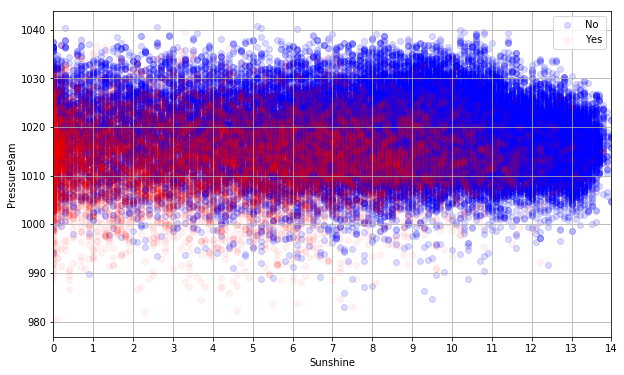

In [11]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['RainTomorrow'] == 'No']['Sunshine'],
            data[data['RainTomorrow'] == 'No']['Pressure9am'],
            alpha = 0.15,
            label = 'No',
            color = 'b')

plt.scatter(data[data['RainTomorrow'] == 'Yes']['Sunshine'],
            data[data['RainTomorrow'] == 'Yes']['Pressure9am'],
            alpha = 0.05,
            label = 'Yes',
            color = 'r')
plt.xlabel('Sunshine')
plt.xticks(range(15))
plt.xlim(0, 14)
plt.ylabel('Pressure9am')
plt.legend()
plt.grid()
pass

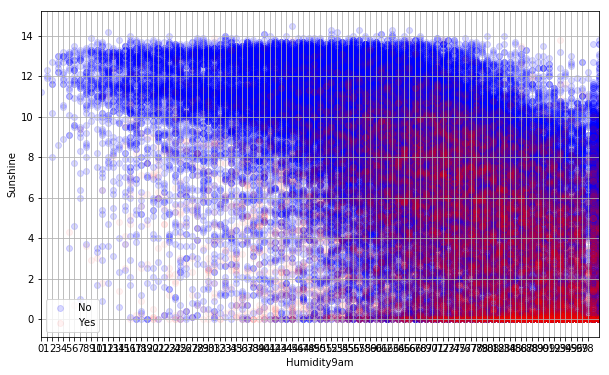

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['RainTomorrow'] == 'No']['Humidity9am'],
            data[data['RainTomorrow'] == 'No']['Sunshine'],
            alpha = 0.15,
            label = 'No',
            color = 'b')

plt.scatter(data[data['RainTomorrow'] == 'Yes']['Humidity9am'],
            data[data['RainTomorrow'] == 'Yes']['Sunshine'],
            alpha = 0.05,
            label = 'Yes',
            color = 'r')
plt.xlabel('Humidity9am')
plt.xticks(range(99))
plt.xlim(0, 100)
plt.ylabel('Sunshine')
plt.legend()
plt.grid()
pass

## Problem

In [13]:
rainTomorrow = data['RainTomorrow']
data = data.drop('RISK_MM', axis = 1)\
           .drop('Date', axis = 1)

data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [14]:
data['RainTomorrow'].tail(10)

142183    No
142184    No
142185    No
142186    No
142187    No
142188    No
142189    No
142190    No
142191    No
142192    No
Name: RainTomorrow, dtype: object

## Prepare data

In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [16]:
for c in categorical_columns:
    print(c, data[c].unique())

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday ['No' 'Yes' nan]
RainTomorrow ['No' 'Yes']


### Prepare missing values

1) I fill missing numerical values as the relevant data or this median.

In [17]:
data.median(axis = 0)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
dtype: float64

In [18]:
data['Pressure9am'].fillna(data['Pressure3pm'], axis = 0, inplace = True)
data['Pressure3pm'].fillna(data['Pressure9am'], axis = 0, inplace = True)

data['MinTemp'].fillna(data['Temp9am'], axis = 0, inplace = True)
data['MaxTemp'].fillna(data['Temp3pm'], axis = 0, inplace = True)
data['MinTemp'].fillna(data['Temp3pm'], axis = 0, inplace = True)
data['MaxTemp'].fillna(data['Temp9am'], axis = 0, inplace = True)

data['WindGustSpeed'].fillna(data['WindSpeed9am'], axis = 0, inplace = True)
data['WindGustSpeed'].fillna(data['WindSpeed3pm'], axis = 0, inplace = True)
data['WindSpeed3pm'].fillna(data['WindSpeed9am'], axis = 0, inplace = True)
data['WindSpeed9am'].fillna(data['WindSpeed3pm'], axis = 0, inplace = True)
data['WindSpeed3pm'].fillna(data['WindGustSpeed'], axis = 0, inplace = True)
data['WindSpeed9am'].fillna(data['WindGustSpeed'], axis = 0, inplace = True)

data['Humidity9am'].fillna(data['Humidity3pm'], axis = 0, inplace = True)
data['Humidity3pm'].fillna(data['Humidity9am'], axis = 0, inplace = True)

data['Cloud9am'].fillna(data['Cloud3pm'], axis = 0, inplace = True)
data['Cloud3pm'].fillna(data['Cloud9am'], axis = 0, inplace = True)

In [19]:
data.fillna(data.median(axis = 0), axis = 0, inplace = True)
data[numerical_columns].count(axis = 0)

MinTemp          142193
MaxTemp          142193
Rainfall         142193
Evaporation      142193
Sunshine         142193
WindGustSpeed    142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Cloud9am         142193
Cloud3pm         142193
Temp9am          142193
Temp3pm          142193
dtype: int64

2) I fill missing categorical values as the column top.

In [20]:
data[categorical_columns].count(axis = 0)

Location        142193
WindGustDir     132863
WindDir9am      132180
WindDir3pm      138415
RainToday       140787
RainTomorrow    142193
dtype: int64

In [21]:
data[categorical_columns].describe()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,132863,132180,138415,140787,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,9780,11393,10663,109332,110316


In [22]:
data['RainToday'].fillna(data['RainToday'].describe().top, inplace = True)

# fill WindGustDir as WindDir3pm or WindDir9am. If both values are NaN when put a top value of WindGustDir
data['WindGustDir'].fillna(data['WindDir9am'], inplace = True)
data['WindGustDir'].fillna(data['WindDir3pm'], inplace = True)
data['WindGustDir'].fillna(data['WindGustDir'].describe().top, inplace = True)

data = data.drop('WindDir9am', axis = 1)\
           .drop('WindDir3pm', axis = 1)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

In [23]:
data[categorical_columns].count(axis = 0)

Location        142193
WindGustDir     142193
RainToday       142193
RainTomorrow    142193
dtype: int64

In [24]:
data[categorical_columns].describe()

,Location,WindGustDir,RainToday,RainTomorrow
count,142193,142193,142193,142193
unique,49,16,2,2
top,Canberra,W,No,No
freq,3418,12057,110738,110316


### Vectorization

In [25]:
binary_columns    = [col for col in categorical_columns if data[col].describe().unique()[1] == 2]
nonbinary_columns = [col for col in categorical_columns if data[col].describe().unique()[1] > 2]
print(binary_columns, nonbinary_columns)

['RainToday', 'RainTomorrow'] ['Location', 'WindGustDir']


1) Binary columns

In [26]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
data.at[data['RainToday'] == 'No', 'RainToday'] = 0
data.at[data['RainToday'] == 'Yes', 'RainToday'] = 1
data['RainToday'].describe()

count    142193.000000
mean          0.221213
std           0.415065
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday, dtype: float64

2) Nonbinary columns

In [28]:
data[nonbinary_columns].head(20)

,Location,WindGustDir
0,Albury,W
1,Albury,WNW
2,Albury,WSW
3,Albury,NE
4,Albury,W
5,Albury,WNW
6,Albury,W
7,Albury,W
8,Albury,NNW
9,Albury,W


In [29]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

In [30]:
len(data_nonbinary.columns)

65

### Exclude big correlations

If some values strongly correlate with each other, a fundamental problem arises in the calculations for learning algorithms.

1) the big correlation between 'MinTemp' and 'Temp9am' (0.901813), between 'MaxTemp' and 'Temp3pm' (0.984562). I think should left only MinTemp and MaxTemp.

2) the big correlation between 'Pressure9am' and 'Pressure3pm' (0.961348). I think should left the one value 'Pressure' as a mean of these.

In [31]:
data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,No
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,No
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,No
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,No
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No
5,Albury,14.6,29.7,0.2,4.8,8.5,WNW,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,No
6,Albury,14.3,25.0,0.0,4.8,8.5,W,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.0,18.1,24.6,0,No
7,Albury,7.7,26.7,0.0,4.8,8.5,W,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,No
8,Albury,9.7,31.9,0.0,4.8,8.5,NNW,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,Yes
9,Albury,13.1,30.1,1.4,4.8,8.5,W,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,No


In [32]:
data['Pressure9am'] = (data['Pressure9am']+data['Pressure3pm']) / 2
data = data.rename(columns={'Pressure9am':'Pressure'})
data = data.drop('Temp9am', axis = 1)\
           .drop('Temp3pm', axis = 1)\
           .drop('Pressure3pm', axis = 1)

numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,20.0,24.0,71.0,22.0,1007.40,8.0,8.0,0,No
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,4.0,22.0,44.0,25.0,1009.20,5.0,5.0,0,No
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,19.0,26.0,38.0,30.0,1008.15,2.0,2.0,0,No
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,11.0,9.0,45.0,16.0,1015.20,5.0,5.0,0,No
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,7.0,20.0,82.0,33.0,1008.40,7.0,8.0,0,No
5,Albury,14.6,29.7,0.2,4.8,8.5,WNW,56.0,19.0,24.0,55.0,23.0,1007.30,5.0,5.0,0,No
6,Albury,14.3,25.0,0.0,4.8,8.5,W,50.0,20.0,24.0,49.0,19.0,1008.90,1.0,1.0,0,No
7,Albury,7.7,26.7,0.0,4.8,8.5,W,35.0,6.0,17.0,48.0,19.0,1011.75,5.0,5.0,0,No
8,Albury,9.7,31.9,0.0,4.8,8.5,NNW,80.0,7.0,28.0,42.0,9.0,1006.25,5.0,5.0,0,Yes
9,Albury,13.1,30.1,1.4,4.8,8.5,W,28.0,15.0,11.0,58.0,27.0,1006.35,5.0,5.0,1,No


### Normalization of numerical columns

In [33]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm,RainToday
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.204263,23.221370,2.326738,5.183213,8.042236,38.255146,14.019572,18.564367,68.825294,51.841525,1016.450099,4.632092,4.667248,0.221213
std,6.409410,7.116909,8.426426,3.185401,2.769638,15.007667,8.895011,8.868022,19.004062,20.828062,6.654115,2.343089,2.226775,0.415065
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,979.750000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,30.000000,7.000000,13.000000,57.000000,37.000000,1012.300000,3.000000,3.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,37.000000,13.000000,19.000000,70.000000,52.000000,1016.400000,5.000000,5.000000,0.000000
75%,16.900000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,66.000000,1020.550000,6.000000,6.000000,0.000000
max,39.600000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,130.000000,100.000000,100.000000,1040.050000,9.000000,9.000000,1.000000


In [34]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Cloud9am,Cloud3pm,RainToday
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,2.703993e-14,-1.084156e-14,-4.198505e-14,-1.046778e-12,6.740794e-14,1.475123e-16,-6.955866e-17,-2.054779e-16,8.634868e-17,1.918860e-17,-1.554105e-11,-2.334613e-16,2.022798e-16,5.756579e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.230292e+00,-3.937295e+00,-2.761239e-01,-1.627177e+00,-2.903714e+00,-2.549040e+00,-1.576116e+00,-2.093406e+00,-3.621610e+00,-2.489023e+00,-5.515399e+00,-1.976917e+00,-2.095968e+00,-5.329604e-01
25%,-7.183598e-01,-7.477079e-01,-2.761239e-01,-3.714486e-01,5.696187e-02,-5.500619e-01,-7.891583e-01,-6.274642e-01,-6.222509e-01,-7.125735e-01,-6.236891e-01,-6.965556e-01,-7.487277e-01,-5.329604e-01
50%,-3.186916e-02,-8.730890e-02,-2.761239e-01,-1.203029e-01,1.652793e-01,-8.363366e-02,-1.146229e-01,4.912406e-02,6.181343e-02,7.608713e-03,-7.529045e-03,1.570186e-01,1.494322e-01,-5.329604e-01
75%,7.326318e-01,6.995495e-01,-2.049193e-01,6.805643e-02,2.374909e-01,5.160598e-01,5.599125e-01,6.129476e-01,7.458777e-01,6.797788e-01,6.161452e-01,5.838057e-01,5.985122e-01,-5.329604e-01
max,4.274300e+00,3.495707e+00,4.375203e+01,4.389299e+01,2.331628e+00,6.446362e+00,1.303882e+01,1.256601e+01,1.640423e+00,2.312192e+00,3.546663e+00,1.864167e+00,1.945752e+00,1.876299e+00


### Join in one data

In [35]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
print(data.columns)

(142193, 81)
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_P

In [36]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,2.703993e-14,-1.084156e-14,-4.198505e-14,-1.046778e-12,6.740794e-14,1.475123e-16,-6.955866e-17,-2.054779e-16,8.634868e-17,1.918860e-17,...,0.064328,0.065531,0.072978,0.064870,0.062781,0.065826,0.084793,0.059307,0.064940,0.221213
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.245337,0.247461,0.260102,0.246296,0.242569,0.247979,0.278575,0.236199,0.246421,0.415065
min,-3.230292e+00,-3.937295e+00,-2.761239e-01,-1.627177e+00,-2.903714e+00,-2.549040e+00,-1.576116e+00,-2.093406e+00,-3.621610e+00,-2.489023e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.183598e-01,-7.477079e-01,-2.761239e-01,-3.714486e-01,5.696187e-02,-5.500619e-01,-7.891583e-01,-6.274642e-01,-6.222509e-01,-7.125735e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.186916e-02,-8.730890e-02,-2.761239e-01,-1.203029e-01,1.652793e-01,-8.363366e-02,-1.146229e-01,4.912406e-02,6.181343e-02,7.608713e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.326318e-01,6.995495e-01,-2.049193e-01,6.805643e-02,2.374909e-01,5.160598e-01,5.599125e-01,6.129476e-01,7.458777e-01,6.797788e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.274300e+00,3.495707e+00,4.375203e+01,4.389299e+01,2.331628e+00,6.446362e+00,1.303882e+01,1.256601e+01,1.640423e+00,2.312192e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X and Y

In [37]:
X = data.drop('RainTomorrow', axis = 1)
Y = data['RainTomorrow']
feature_names = X.columns
print(feature_names)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',

In [38]:
X = X.to_numpy()
Y = np.array(Y != 'No', dtype='int')
Y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print(X.shape)
print(Y.shape)
N, col = X.shape

(142193, 80)
(142193,)


In [40]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
rainTomorrow.shape

(142193,)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

99535 42658


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [45]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [46]:
Y_train_predict = knn.predict(X_train)
err_train  = np.mean(Y_train  != Y_train_predict)
print(err_train)

0.1274325614105591


In [47]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test  != Y_test_predict)
print(err_test)

0.16158750996296123


In [48]:
err_test = 1 - knn.score(X_test, Y_test)
print(err_test)

0.16158750996296123


In [49]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[31164  1969]
 [ 4924  4601]]


err_train < err_test. It happens because of algorithm trained on training sample. Error is 16% for rain prediction. 